In [6]:
import sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

In [7]:
dataset = datasets.load_iris()
X_sepal, y_sepal = dataset.data[:, :2], dataset.target
X_petal, y_petal = dataset.data[:, 2:], dataset.target
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


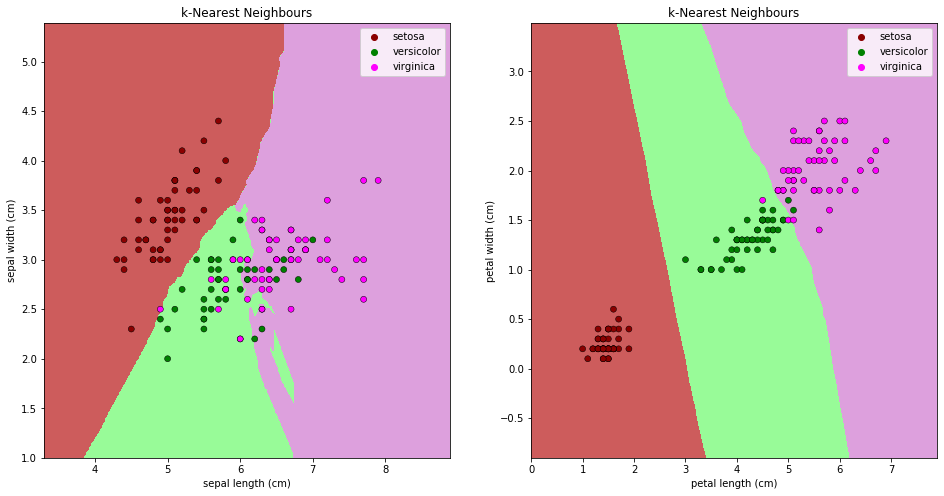

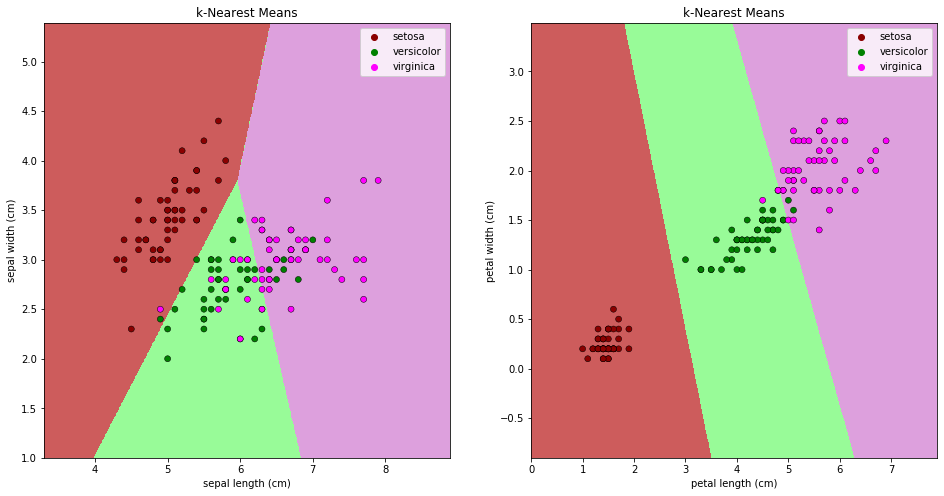

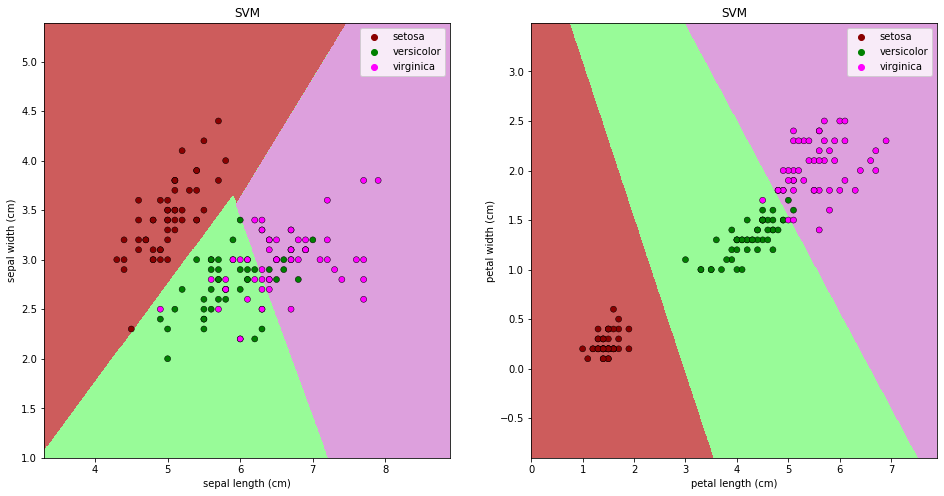

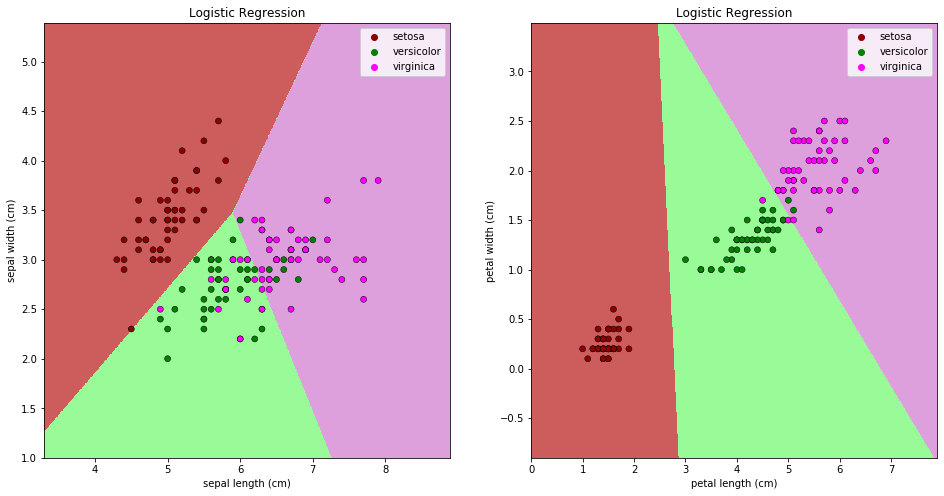

In [8]:


classifiers = [KNeighborsClassifier(21, weights='uniform'), NearestCentroid(), SVC(kernel='linear'), LogisticRegression(random_state=0)]
classifier_names = ['k-Nearest Neighbours', 'k-Nearest Means', 'SVM', 'Logistic Regression']


def classify(classifier, X, y):
    classifier.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z




for classifier, name in zip(classifiers, classifier_names):
    xx_s, yy_s, Z_s = classify(classifier, X_sepal, y_sepal)
    xx_p, yy_p, Z_p = classify(classifier, X_petal, y_petal)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    ax[0].contourf(xx_s, yy_s, Z_s, cmap=ListedColormap(['indianred', 'palegreen', 'plum']))
    sns.scatterplot(x=X_sepal[:, 0], y=X_sepal[:, 1], hue=dataset.target_names[y_sepal], ax=ax[0],
                    palette=['darkred', 'green', 'fuchsia'], alpha=1.0, edgecolor="black")
    ax[0].set_xlim(xx_s.min(), xx_s.max())
    ax[0].set_ylim(yy_s.min(), yy_s.max())
    ax[0].set_title(name)
    ax[0].set_xlabel(dataset.feature_names[:2][0])
    ax[0].set_ylabel(dataset.feature_names[:2][1])

    ax[1].contourf(xx_p, yy_p, Z_p, cmap=ListedColormap(['indianred', 'palegreen', 'plum']))
    sns.scatterplot(x=X_petal[:, 0], y=X_petal[:, 1], hue=dataset.target_names[y_petal], ax=ax[1],
                    palette=['darkred', 'green', 'fuchsia'], alpha=1.0, edgecolor="black")
    ax[1].set_xlim(xx_p.min(), xx_p.max())
    ax[1].set_ylim(yy_p.min(), yy_p.max())
    ax[1].set_title(name)
    ax[1].set_xlabel(dataset.feature_names[2:][0])
    ax[1].set_ylabel(dataset.feature_names[2:][1])

Text(0, 0.5, 'petal width (cm)')

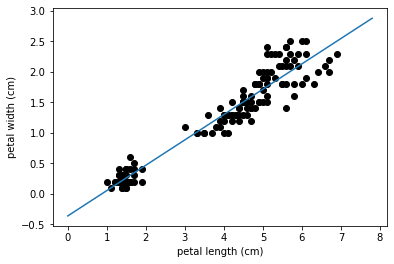

In [15]:
X_petal_length = X_petal[:, np.newaxis, 0]
X_petal_width = X_petal[:, np.newaxis, 1]


regr = LinearRegression()

regr.fit(X_petal_length, X_petal_width)

l = np.arange(X_petal_length.min() - 1, X_petal_length.max() + 1, 0.1).reshape(-1, 1)
Z = regr.predict(l)
plt.scatter(X_petal_length, X_petal_width,  color='black')
plt.plot(l, Z)
plt.xlabel(dataset.feature_names[2])
plt.ylabel(dataset.feature_names[3])

[[ 2.26215842]
 [-0.81476527]
 [-0.03902481]
 [ 0.80010402]
 [ 2.38109972]
 [-0.89719729]
 [-1.07727368]
 [ 0.58531803]
 [ 0.85624931]
 [-1.25249551]
 [-1.13050893]
 [ 0.32864345]
 [-1.56180147]
 [ 0.68226297]
 [-0.77119098]
 [-0.3370525 ]
 [-0.98262242]
 [-0.90877662]
 [ 1.45977478]
 [ 2.82195061]
 [ 1.6118659 ]
 [ 2.22367038]
 [ 1.78235695]
 [-1.04530497]
 [ 2.68661869]
 [ 0.0694917 ]
 [ 0.3567319 ]
 [ 0.74362425]
 [-1.01958015]
 [-1.54884534]
 [ 1.75637165]
 [-0.50126675]
 [ 0.38223455]
 [ 0.12292783]
 [ 1.02515308]
 [ 1.83490901]
 [ 3.05735652]
 [-1.36276791]
 [-0.10657169]
 [-1.35013445]
 [ 1.55192666]
 [-1.15438931]
 [-1.21534476]
 [ 2.66599355]
 [-1.30869882]
 [ 2.06897728]
 [-1.08122832]
 [-0.6142951 ]
 [ 1.63760674]
 [-0.80487577]
 [ 2.30349348]
 [-0.69831874]
 [ 0.57475262]
 [-0.86918735]
 [-0.90158812]
 [-1.00965192]
 [ 0.46000785]
 [ 1.33387617]
 [-1.18513426]
 [ 0.68304666]
 [-0.58979838]
 [-0.51093418]
 [ 1.10929806]
 [ 0.72140793]
 [ 0.3505016 ]
 [ 0.28984683]
 [-1.36800

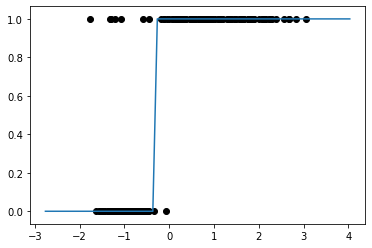

In [23]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=1, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1)
print(X)
regr = LogisticRegression(C=1e5)
regr.fit(X, y)

l = np.arange(X.min() - 1, X.max() + 1, 0.1).reshape(-1, 1)
Z = regr.predict(l)
plt.scatter(X, y,  color='black')
plt.plot(l, Z)